In [1]:
# importing dependencies

import pandas as pd
from pathlib import Path
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# retriving the path of csv file
csv_path = Path("../","Resources", "owid-covid-data.csv")

# initializing dataframe
initial_covid_df = pd.read_csv(csv_path)

In [3]:
# obtaining a list of columns 

initial_covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
# creating a new dataframe that shows only necessary columns

reduced_covid_df = initial_covid_df[["location", "date", "total_cases_per_million", "new_cases_per_million", "total_deaths_per_million", 
                                     "new_deaths_per_million", "icu_patients_per_million", "hosp_patients_per_million", "positive_rate",
                                     "total_vaccinations_per_hundred", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred",
                                     "new_vaccinations", "median_age", "aged_65_older", "aged_70_older", "cardiovasc_death_rate",
                                     "diabetes_prevalence", "female_smokers", "male_smokers"]]

reduced_covid_df.head()

,location,date,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,positive_rate,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,Afghanistan,2020-01-03,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
1,Afghanistan,2020-01-04,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
2,Afghanistan,2020-01-05,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
3,Afghanistan,2020-01-06,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN
4,Afghanistan,2020-01-07,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN


In [5]:
# formatting datetime

reduced_covid_df_date = reduced_covid_df["date"].astype({"date": "datetime64[ns]"})

reduced_covid_df_date.info


<bound method Series.info of 0        2020-01-03
1        2020-01-04
2        2020-01-05
3        2020-01-06
4        2020-01-07
            ...    
348537   2023-10-08
348538   2023-10-09
348539   2023-10-10
348540   2023-10-11
348541   2023-10-12
Name: date, Length: 348542, dtype: datetime64[ns]>

In [6]:
# categorizing the date by month and year and removing the date column

reduced_covid_df["month"] = reduced_covid_df_date.dt.month

reduced_covid_df["year"] = reduced_covid_df_date.dt.year

del reduced_covid_df["date"]

reduced_covid_df

/var/folders/d8/t2gjvqln35zbh9nzb6yb_0cc0000gn/T/ipykernel_11065/3045909976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_covid_df["month"] = reduced_covid_df_date.dt.month
/var/folders/d8/t2gjvqln35zbh9nzb6yb_0cc0000gn/T/ipykernel_11065/3045909976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_covid_df["year"] = reduced_covid_df_date.dt.year


,location,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,icu_patients_per_million,hosp_patients_per_million,positive_rate,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,new_vaccinations,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,month,year
0,Afghanistan,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,1,2020
1,Afghanistan,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,1,2020
2,Afghanistan,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,1,2020
3,Afghanistan,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,1,2020
4,Afghanistan,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,18.6,2.581,1.337,597.029,9.59,NaN,NaN,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348537,Zimbabwe,16284.45,0.0,350.356,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,10,2023
348538,Zimbabwe,16284.45,0.0,350.356,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,10,2023
348539,Zimbabwe,16284.45,0.0,350.356,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,10,2023
348540,Zimbabwe,16284.45,0.0,350.356,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,19.6,2.822,1.882,307.846,1.82,1.6,30.7,10,2023


## Possible Questions to Ask:
* 1. How does the vaccine affect the ICU patients rate per million? (Linreg)
* 2. How does vaccine affect the positive rate? (Linreg)
* 3. How does the population affect the ICU patients rate and the positive rate per million? (linreg)
* 4. Standard deviation of each drug
* 5. How the vaccine (w/ & w/o booster) (x) affect the at risk patients? (f(x))
* 6. The affect of the vaccine on the % of the ICU patients

In [7]:
# making a list of locations that are not countries to exclude from rows
non_countries = ["World", "Asia", "Lower middle income", "Upper middle income", "Africa",
                 "High income", "Europe", "Low income", "North America", "European Union", "South America"]

# setting an index in order to drop rows from this column
cleaning_location = reduced_covid_df.set_index("location")

# dropping rows containing non countries
cleaning_location.drop(["World", "Asia", "Lower middle income", "Upper middle income", "Africa",
                 "High income", "Europe", "Low income", "North America", "European Union", "South America"], inplace = True)

# resetting the index
cleaned_covid_df = cleaning_location.reset_index()

In [8]:
# renaming columns for readability
cleaner_covid_df = cleaned_covid_df.rename(columns={
    "location": "Country",
    "total_cases_per_million": "Total Cases (per million)",
    "new_cases_per_million": "New Cases (per million)",
    "total_deaths_per_million": "Total Deaths (per million)",
    "new_deaths_per_million": "New Deaths (per million)",
    "icu_patients_per_million": "ICU Patients (per million)",
    "hosp_patients_per_million": "Hospitalized Patients (per million)",
    "positive_rate": "Positive Rate",
    "total_vaccinations_per_hundred": "Total Vaccinations (per hundred)",
    "people_vaccinated_per_hundred": "People Vaccinated (per hundred)",
    "people_fully_vaccinated_per_hundred": "People Fully Vaccinated (per hundred)",
    "new_vaccinations": "New Vaccinations",
    "median_age": "Median Age",
    "aged_65_older": "Aged Over 65",
    "aged_70_older": "Aged Over 70",
    "cardiovasc_death_rate": "Poor Cardiovascular Death Rate",
    "diabetes_prevalence": "Diabetes Prevalence",
    "female_smokers": "Female Smokers",
    "male_smokers": "Male Smokers",
    "month": "Month",
    "year": "Year"
})

cleaner_covid_df.count()

Country                                  333350
Total Cases (per million)                295651
New Cases (per million)                  323841
Total Deaths (per million)               274213
New Deaths (per million)                 323883
ICU Patients (per million)                37565
Hospitalized Patients (per million)       38835
Positive Rate                             95927
Total Vaccinations (per hundred)          67852
People Vaccinated (per hundred)           64465
People Fully Vaccinated (per hundred)     61298
New Vaccinations                          53958
Median Age                               273770
Aged Over 65                             264147
Aged Over 70                             271012
Poor Cardiovascular Death Rate           268906
Diabetes Prevalence                      282658
Female Smokers                           201366
Male Smokers                             198608
Month                                    333350
Year                                    

In [9]:
# finding the countries with data for ICU Patients (per million)

icu_pat = cleaner_covid_df[cleaner_covid_df['ICU Patients (per million)'].notna()]['Country'].unique()
icu_pat

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Belgium',
       'Bolivia', 'Bulgaria', 'Canada', 'Chile', 'Cyprus', 'Czechia',
       'Denmark', 'England', 'Estonia', 'Finland', 'France', 'Germany',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Malta', 'Netherlands',
       'Northern Ireland', 'Portugal', 'Romania', 'Scotland', 'Serbia',
       'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'United Kingdom', 'United States',
       'Wales'], dtype=object)

In [10]:
# creating a dataframe with only select countries with ICU and vaccination data

def clean(df): 
    final = cleaner_covid_df.loc[cleaner_covid_df["Country"].isin(icu_pat), :]
    return final

icu_location_data = clean(cleaner_covid_df)

icu_location = icu_location_data[["Country", "Year", "Month", "ICU Patients (per million)", "People Vaccinated (per hundred)", "Median Age",
                                  "Total Deaths (per million)", "Aged Over 65", "Hospitalized Patients (per million)", "Aged Over 70",
                                  "Male Smokers", "Female Smokers", "Positive Rate"]]

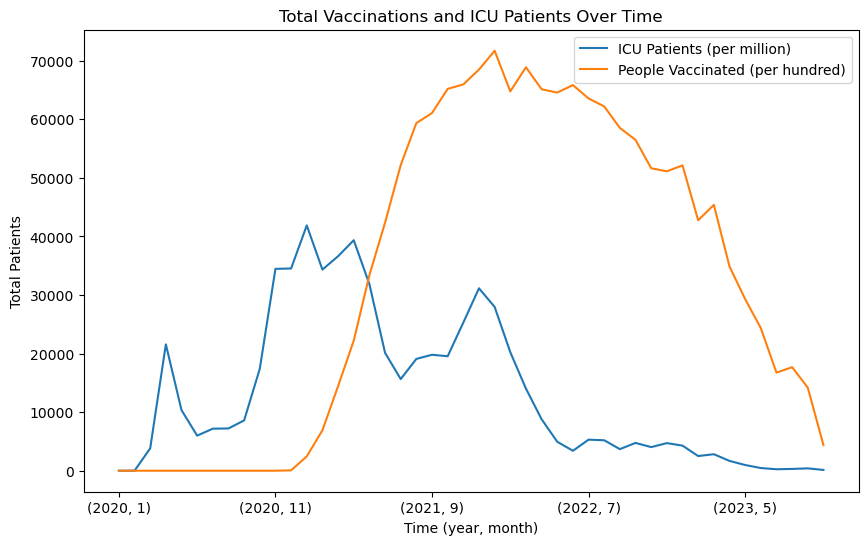

In [11]:
# graphing ICU patients vs vaccine

icu_vax = icu_location[["Month", "Year", "ICU Patients (per million)", "People Vaccinated (per hundred)"]]
icu_vax.fillna(0)
icu_vax_group = icu_vax.groupby(["Year", "Month"]).sum()
icu_vax_group

figure_icu_vax = icu_vax_group.plot(figsize=(10,6),
                                xlabel="Time (year, month)",
                                ylabel="Total Patients",
                                title="Total Vaccinations and ICU Patients Over Time")

plt.show()

In [12]:
# finding the countries with data for Hospitalized Patients (per million)

hosp_pat = cleaner_covid_df[cleaner_covid_df['Hospitalized Patients (per million)'].notna()]['Country'].unique()
hosp_pat

array(['Australia', 'Austria', 'Belgium', 'Bolivia', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'England', 'Estonia',
       'Finland', 'France', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Netherlands', 'Northern Ireland', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Scotland', 'Serbia', 'Slovakia', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom', 'United States', 'Wales'], dtype=object)

In [13]:
# creating a dataframe with only select countries with hospitalization and vaccination data

def clean(df): 
    final = cleaner_covid_df.loc[cleaner_covid_df["Country"].isin(hosp_pat), :]
    return final

hosp_location_data = clean(cleaner_covid_df)

hosp_location = hosp_location_data[["Country", "Year", "Month", "Hospitalized Patients (per million)", "People Vaccinated (per hundred)"]]

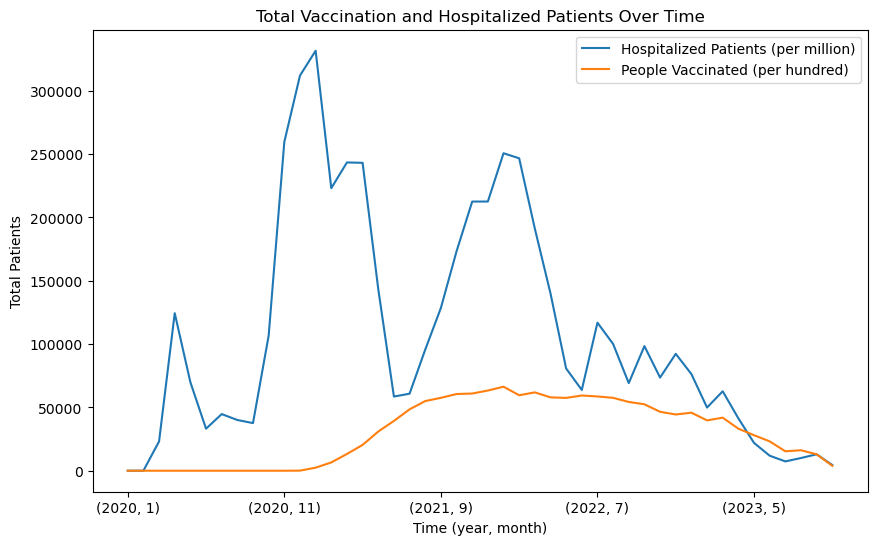

In [14]:
# graphing hosp patients vs vaccine

hosp_vax = hosp_location[["Month", "Year", "Hospitalized Patients (per million)", "People Vaccinated (per hundred)"]]
hosp_vax.fillna(0)
hosp_vax_group = hosp_vax.groupby(["Year", "Month"]).sum()
hosp_vax_group

figure_icu_vax = hosp_vax_group.plot(figsize=(10,6),
                                xlabel="Time (year, month)",
                                ylabel="Total Patients",
                                title="Total Vaccination and Hospitalized Patients Over Time")

plt.show()

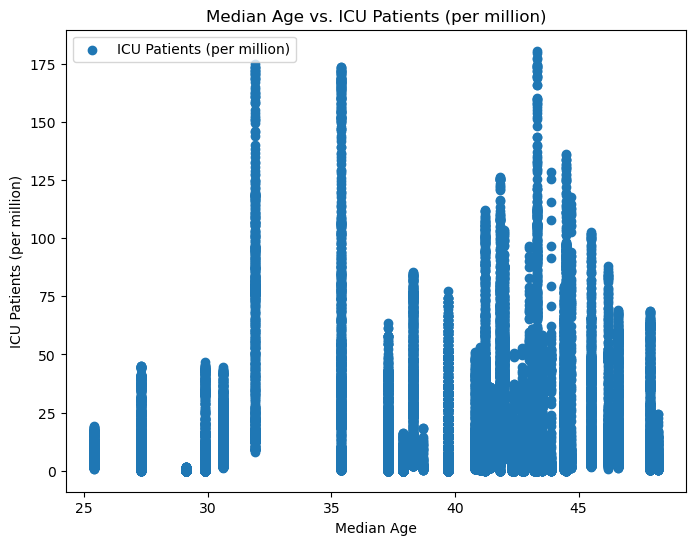

In [15]:
# graphing median age and how it affects ICU rate


median_icu = icu_location[["Month", "Year", "ICU Patients (per million)", "Median Age"]]
median_icu.fillna(0)

plt.figure(figsize=(8, 6))
plt.scatter(median_icu["Median Age"], median_icu["ICU Patients (per million)"], marker="o", label="ICU Patients (per million)")
plt.title("Median Age vs. ICU Patients (per million)")
plt.xlabel("Median Age")
plt.ylabel("ICU Patients (per million)")
plt.legend()
plt.show()


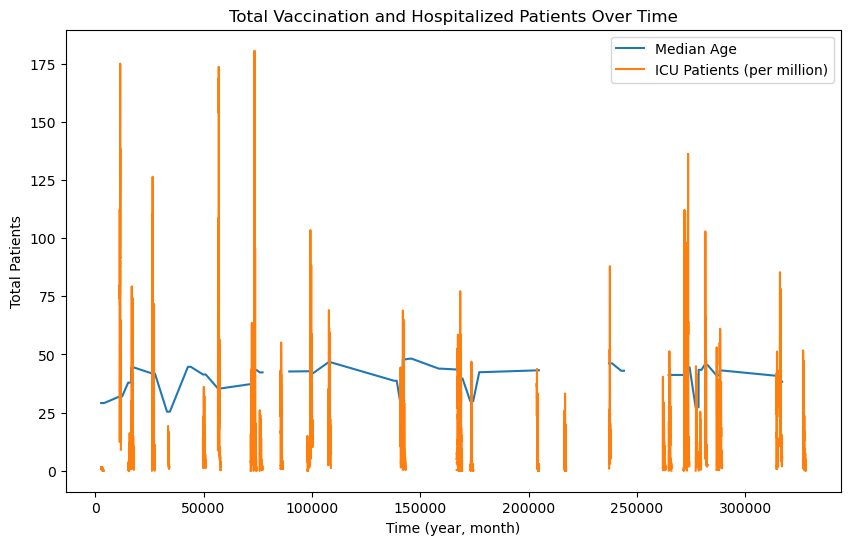

In [16]:
median_icu = icu_location[["Median Age", "ICU Patients (per million)"]]
median_icu.dropna(how="any")


figure_median = median_icu.plot(figsize=(10,6),
                                xlabel="Time (year, month)",
                                ylabel="Total Patients",
                                title="Total Vaccination and Hospitalized Patients Over Time")


In [17]:
# standard deviation
median_icu_std = median_icu[['ICU Patients (per million)', 'Median Age']].fillna(0).std()
median_icu_sem = median_icu[['ICU Patients (per million)', 'Median Age']].fillna(0).sem()

print('Standard Deviation:')
print(median_icu_std)
print('--------------')
print('Standard Deviation Error:')
print(median_icu_sem)

#The Total Deaths and the median age for the countries deviate a lot 

Standard Deviation:
ICU Patients (per million)    20.135231
Median Age                    12.667968
dtype: float64
--------------
Standard Deviation Error:
ICU Patients (per million)    0.083947
Median Age                    0.052815
dtype: float64


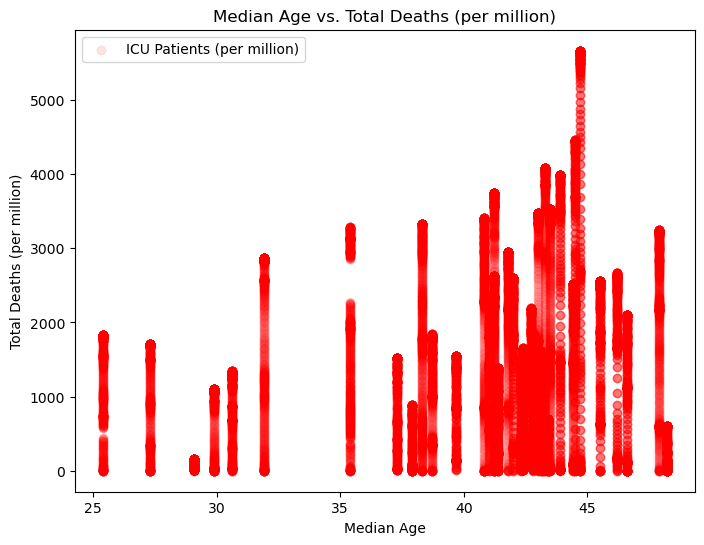

In [18]:
# graphing median age and total deaths

median_icu = icu_location[["Total Deaths (per million)", "Median Age"]]
median_icu.fillna(0)

plt.figure(figsize=(8, 6))
plt.scatter(median_icu["Median Age"], median_icu["Total Deaths (per million)"], marker="o", label="ICU Patients (per million)", color="r", alpha=0.1)
plt.title("Median Age vs. Total Deaths (per million)")
plt.xlabel("Median Age")
plt.ylabel("Total Deaths (per million)")
plt.legend()
plt.show()

In [19]:
#stats
median_death_std = median_icu[['Total Deaths (per million)', 'Median Age']].fillna(0).std()
median_death_sem = median_icu[['Total Deaths (per million)', 'Median Age']].fillna(0).sem()

print('Standard Deviation:')
print(median_death_std)
print('--------------')
print('Standard Deviation Error:')
print(median_death_sem)

#The Total Deaths have a wide range based on age, showing age to be a weak correlate


Standard Deviation:
Total Deaths (per million)    1239.813693
Median Age                      12.667968
dtype: float64
--------------
Standard Deviation Error:
Total Deaths (per million)    5.168987
Median Age                    0.052815
dtype: float64


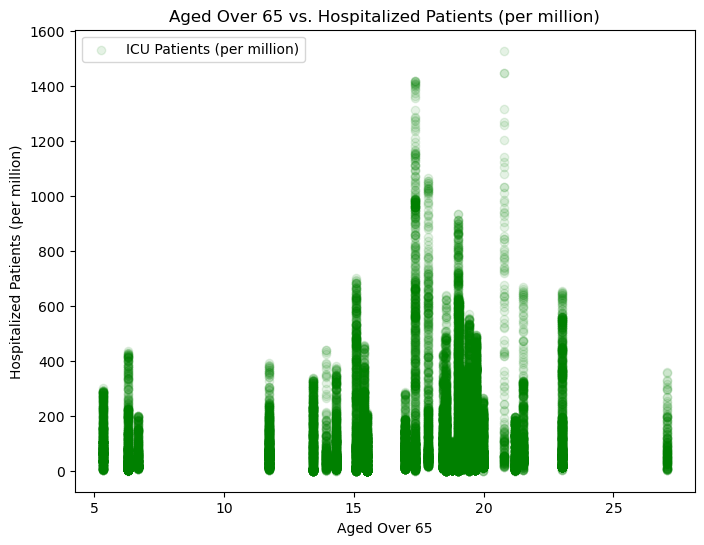

In [20]:
# graphing risk factors vs hospitalizations

risk_factors = icu_location[["Hospitalized Patients (per million)", "Aged Over 65"]]
risk_factors.fillna(0)

plt.figure(figsize=(8, 6))
plt.scatter(risk_factors["Aged Over 65"], risk_factors["Hospitalized Patients (per million)"], marker="o", label="ICU Patients (per million)", color="g", alpha=0.1)
plt.title("Aged Over 65 vs. Hospitalized Patients (per million)")
plt.xlabel("Aged Over 65")
plt.ylabel("Hospitalized Patients (per million)")
plt.legend()
plt.show()


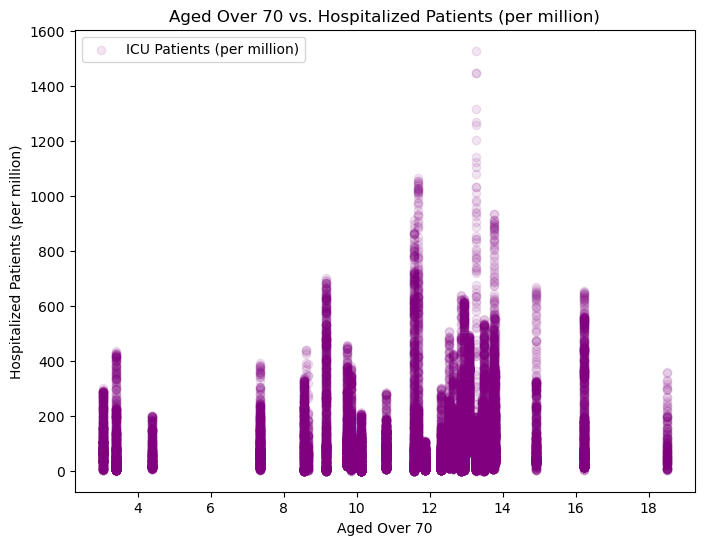

In [21]:
# graphing aged over 70 vs hospitalizations

risk_factors = icu_location[["Hospitalized Patients (per million)", "Aged Over 70"]]
risk_factors.fillna(0)

plt.figure(figsize=(8, 6))
plt.scatter(risk_factors["Aged Over 70"], risk_factors["Hospitalized Patients (per million)"], marker="o", label="ICU Patients (per million)", color="purple", alpha=0.1)
plt.title("Aged Over 70 vs. Hospitalized Patients (per million)")
plt.xlabel("Aged Over 70")
plt.ylabel("Hospitalized Patients (per million)")
plt.legend()
plt.show()

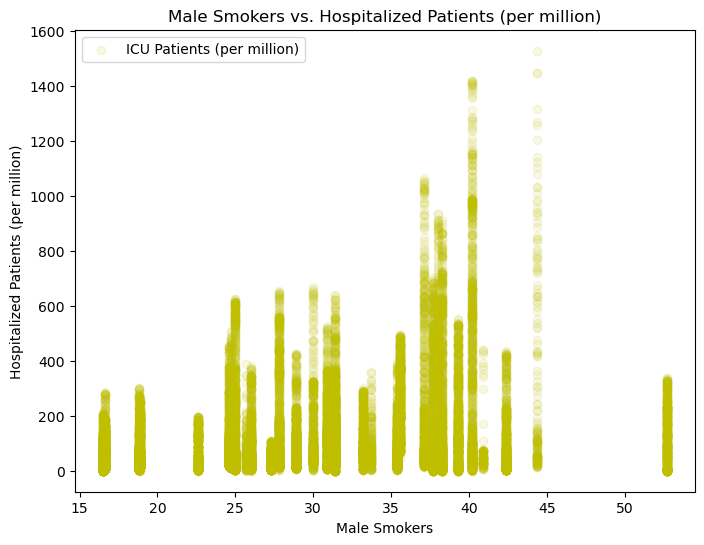

In [22]:
# graphing male smokers vs hospitalizations

risk_factors = icu_location[["Hospitalized Patients (per million)", "Male Smokers"]]
risk_factors.fillna(0)

plt.figure(figsize=(8, 6))
plt.scatter(risk_factors["Male Smokers"], risk_factors["Hospitalized Patients (per million)"], marker="o", label="ICU Patients (per million)", color="y", alpha=0.1)
plt.title("Male Smokers vs. Hospitalized Patients (per million)")
plt.xlabel("Male Smokers")
plt.ylabel("Hospitalized Patients (per million)")
plt.legend()
plt.show()

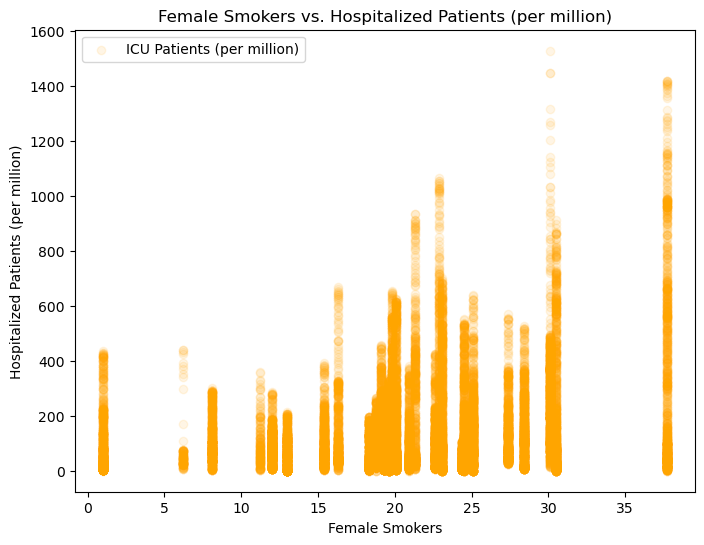

In [23]:
# graphing male smokers vs hospitalizations

risk_factors = icu_location[["Hospitalized Patients (per million)", "Female Smokers"]]
risk_factors.fillna(0)

plt.figure(figsize=(8, 6))
plt.scatter(risk_factors["Female Smokers"], risk_factors["Hospitalized Patients (per million)"], marker="o", label="ICU Patients (per million)", color="orange", alpha=0.1)
plt.title("Female Smokers vs. Hospitalized Patients (per million)")
plt.xlabel("Female Smokers")
plt.ylabel("Hospitalized Patients (per million)")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/mathewsoriano/anaconda3/envs/PythonData_2023_08/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


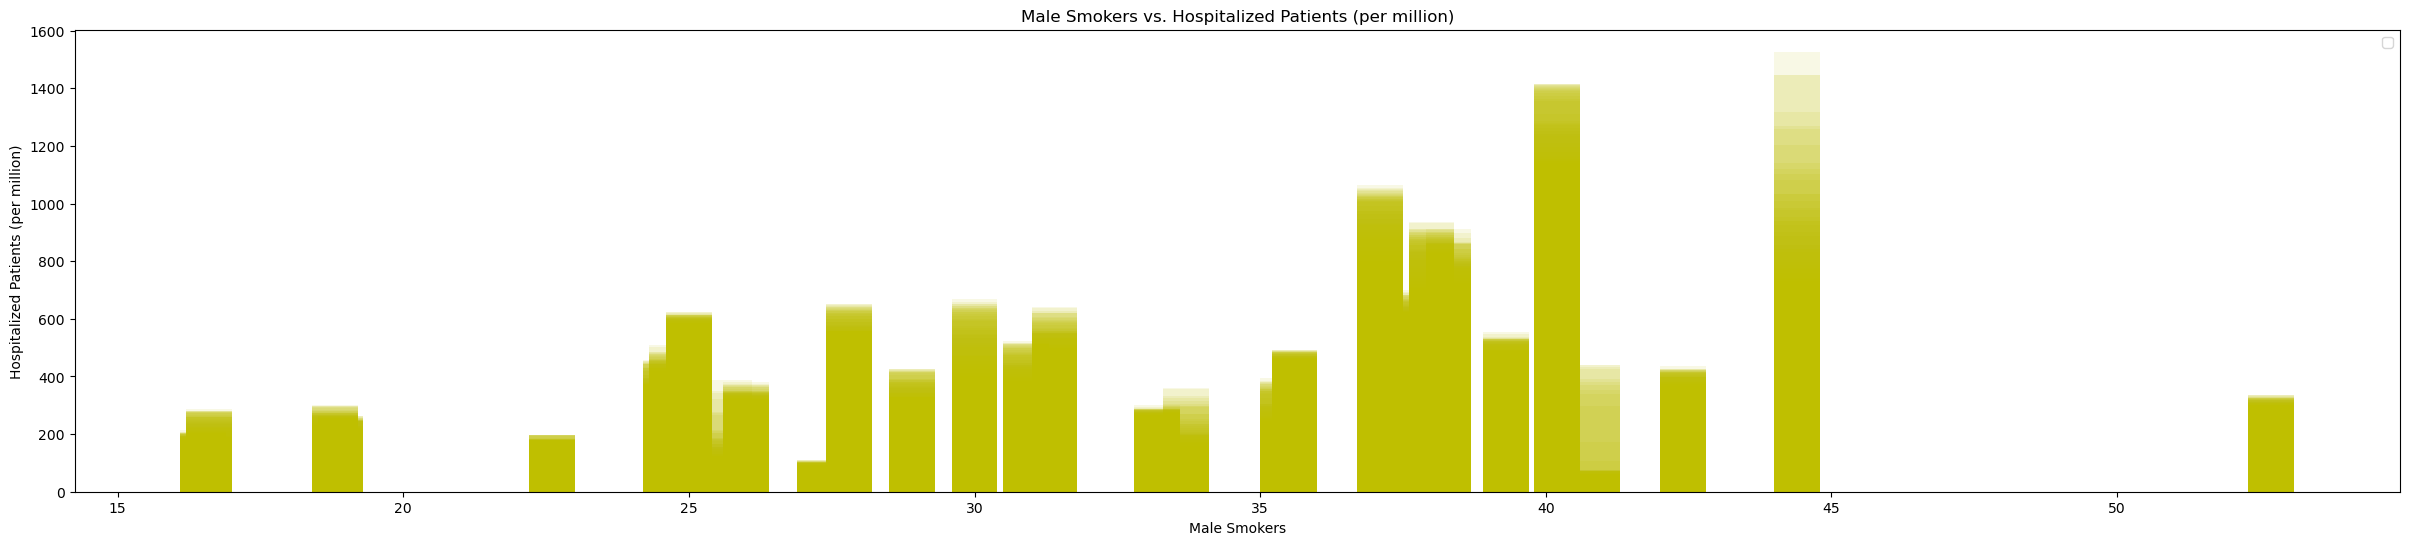

In [24]:
# graphing male smokers vs hospitalizations

risk_factors = icu_location[["Hospitalized Patients (per million)", "Male Smokers"]]
risk_factors.fillna(0)

plt.figure(figsize=(30, 6))
plt.bar(risk_factors["Male Smokers"], risk_factors["Hospitalized Patients (per million)"], color="y", alpha=0.1)
plt.title("Male Smokers vs. Hospitalized Patients (per million)")
plt.xlabel("Male Smokers")
plt.ylabel("Hospitalized Patients (per million)")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


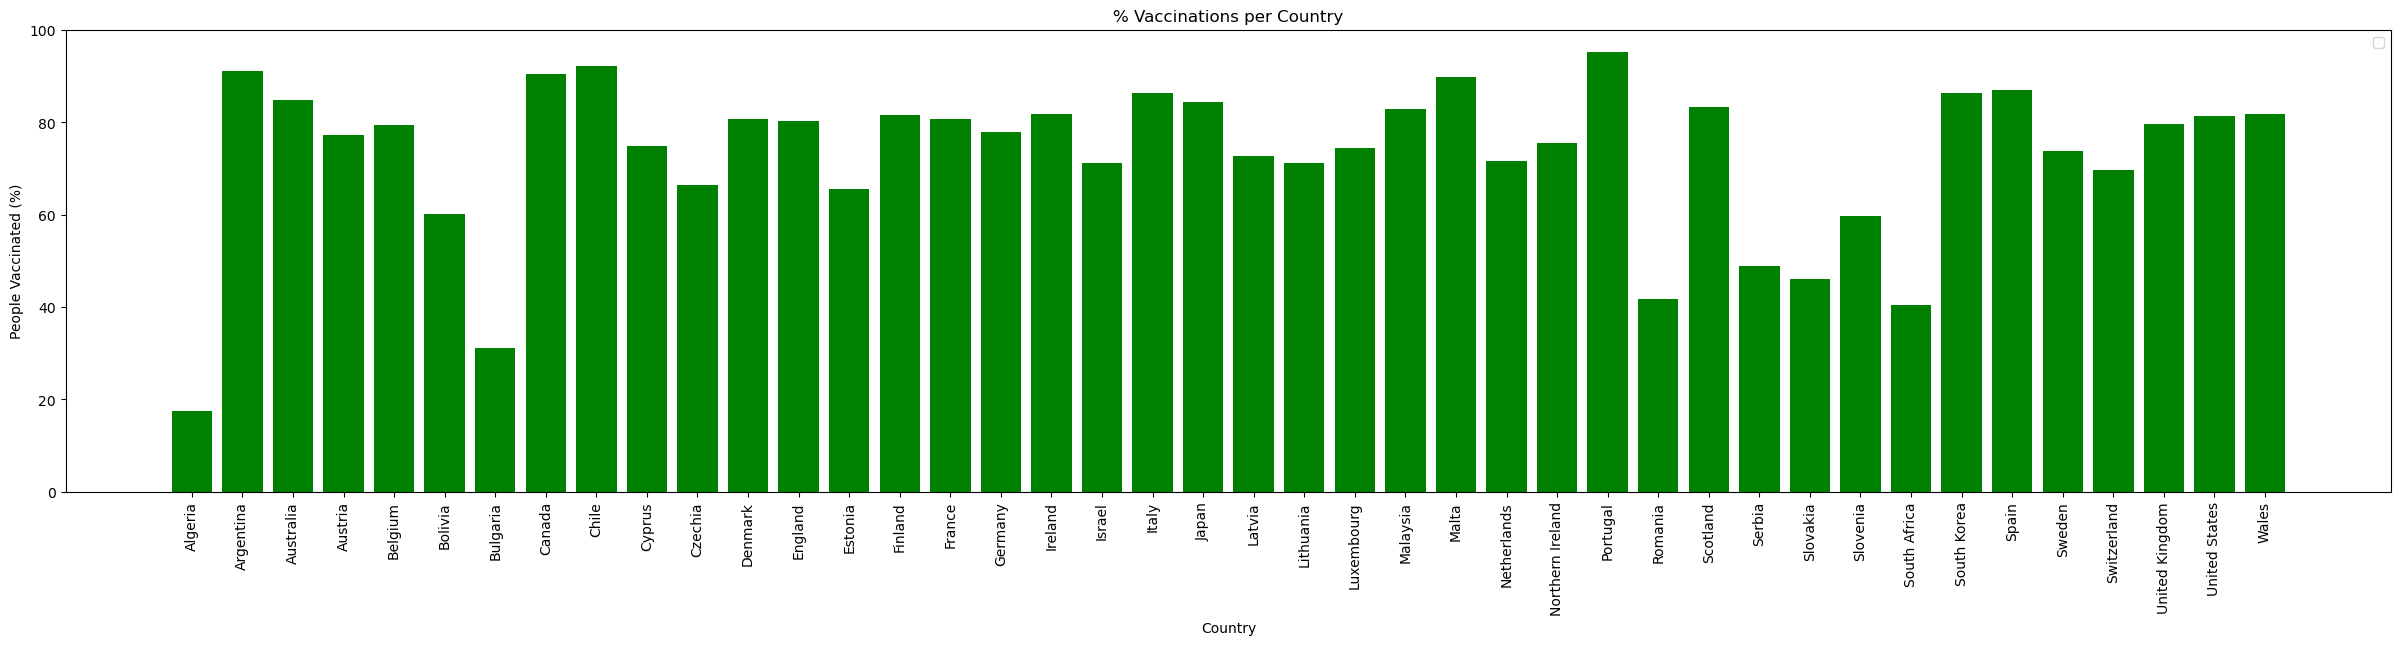

In [39]:
country_vax = icu_location[["Country", "People Vaccinated (per hundred)"]]


plt.figure(figsize=(30, 6))
plt.bar(country_vax["Country"], country_vax["People Vaccinated (per hundred)"], color="g")
plt.title("% Vaccinations per Country")
plt.xlabel("Country")
plt.ylabel("People Vaccinated (%)")
plt.xticks(rotation = "vertical")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


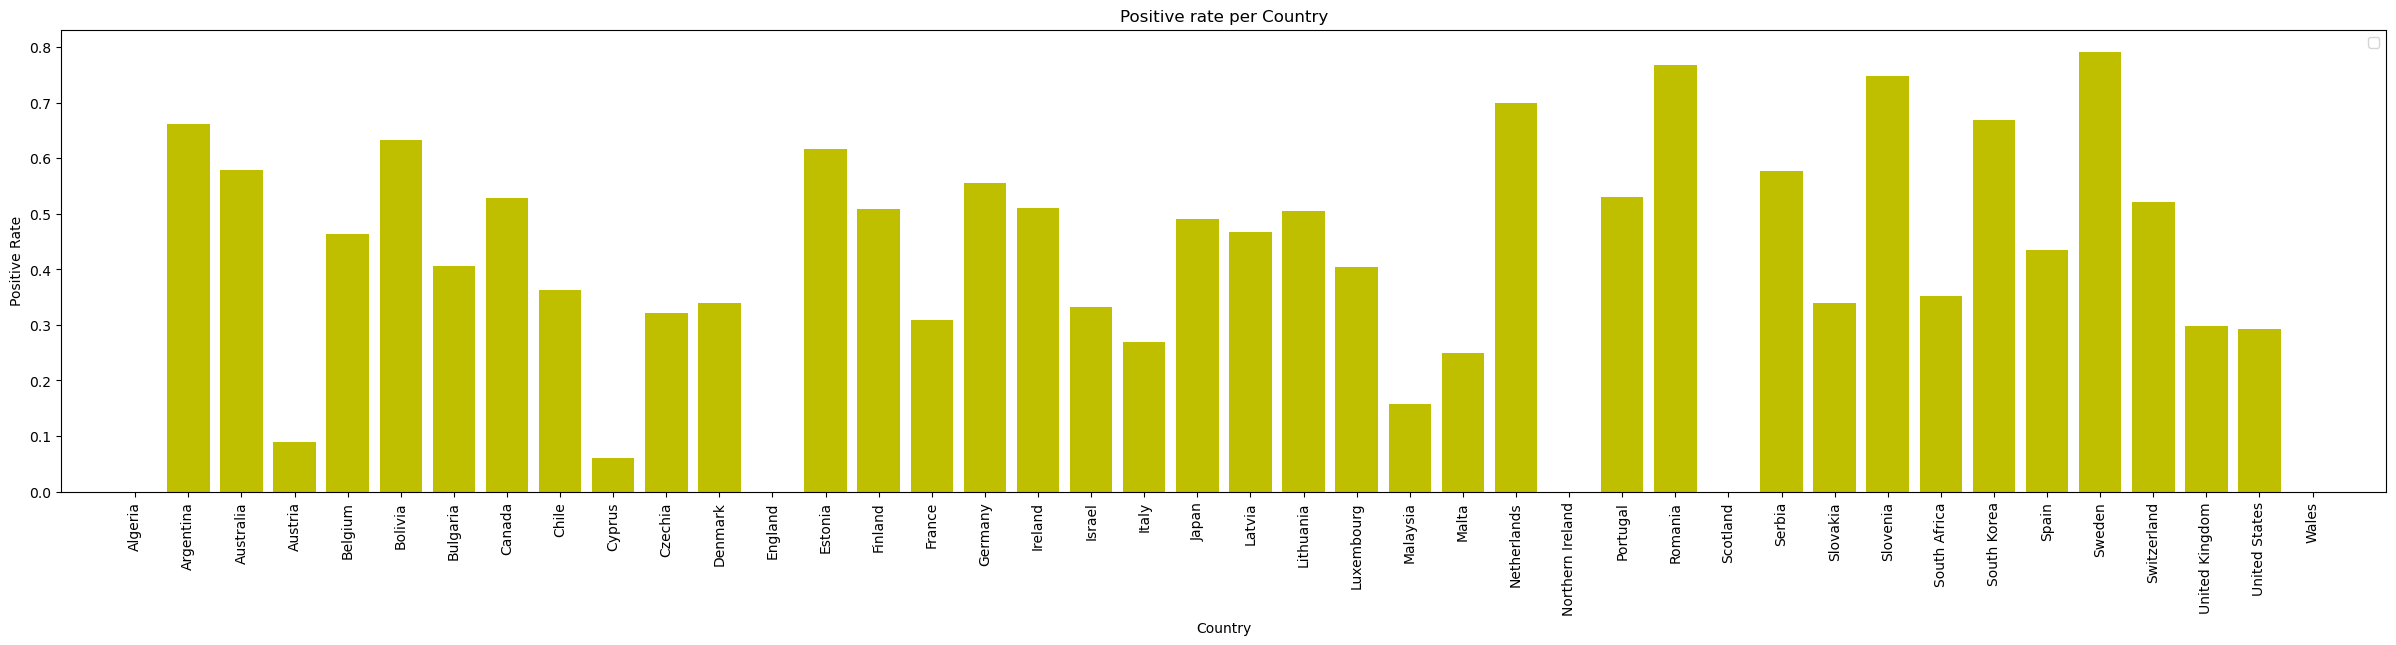

In [25]:
country_pos = icu_location[["Country", "Positive Rate"]]


plt.figure(figsize=(30, 6))
plt.bar(country_pos["Country"], country_pos["Positive Rate"], color="y")
plt.title("Positive rate per Country")
plt.xlabel("Country")
plt.ylabel("Positive Rate")
plt.xticks(rotation = "vertical")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


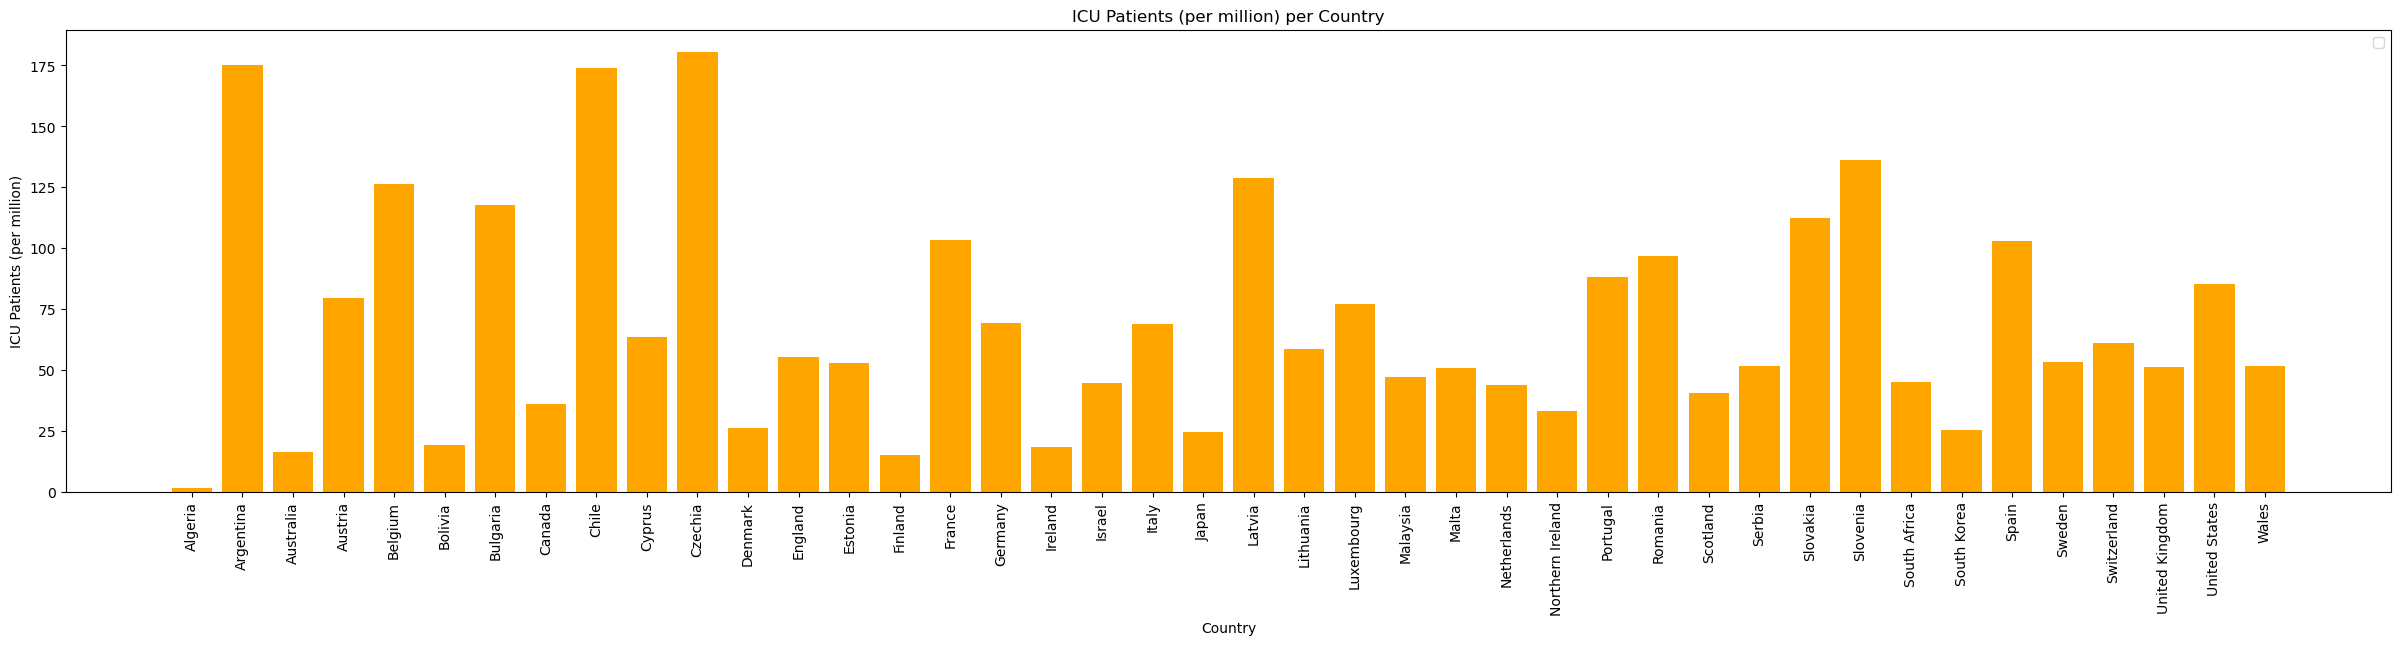

In [26]:
country_icu = icu_location[["Country", "ICU Patients (per million)"]]


plt.figure(figsize=(30, 6))
plt.bar(country_icu["Country"], country_icu["ICU Patients (per million)"], color="orange")
plt.title("ICU Patients (per million) per Country")
plt.xlabel("Country")
plt.ylabel("ICU Patients (per million)")
plt.xticks(rotation = "vertical")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


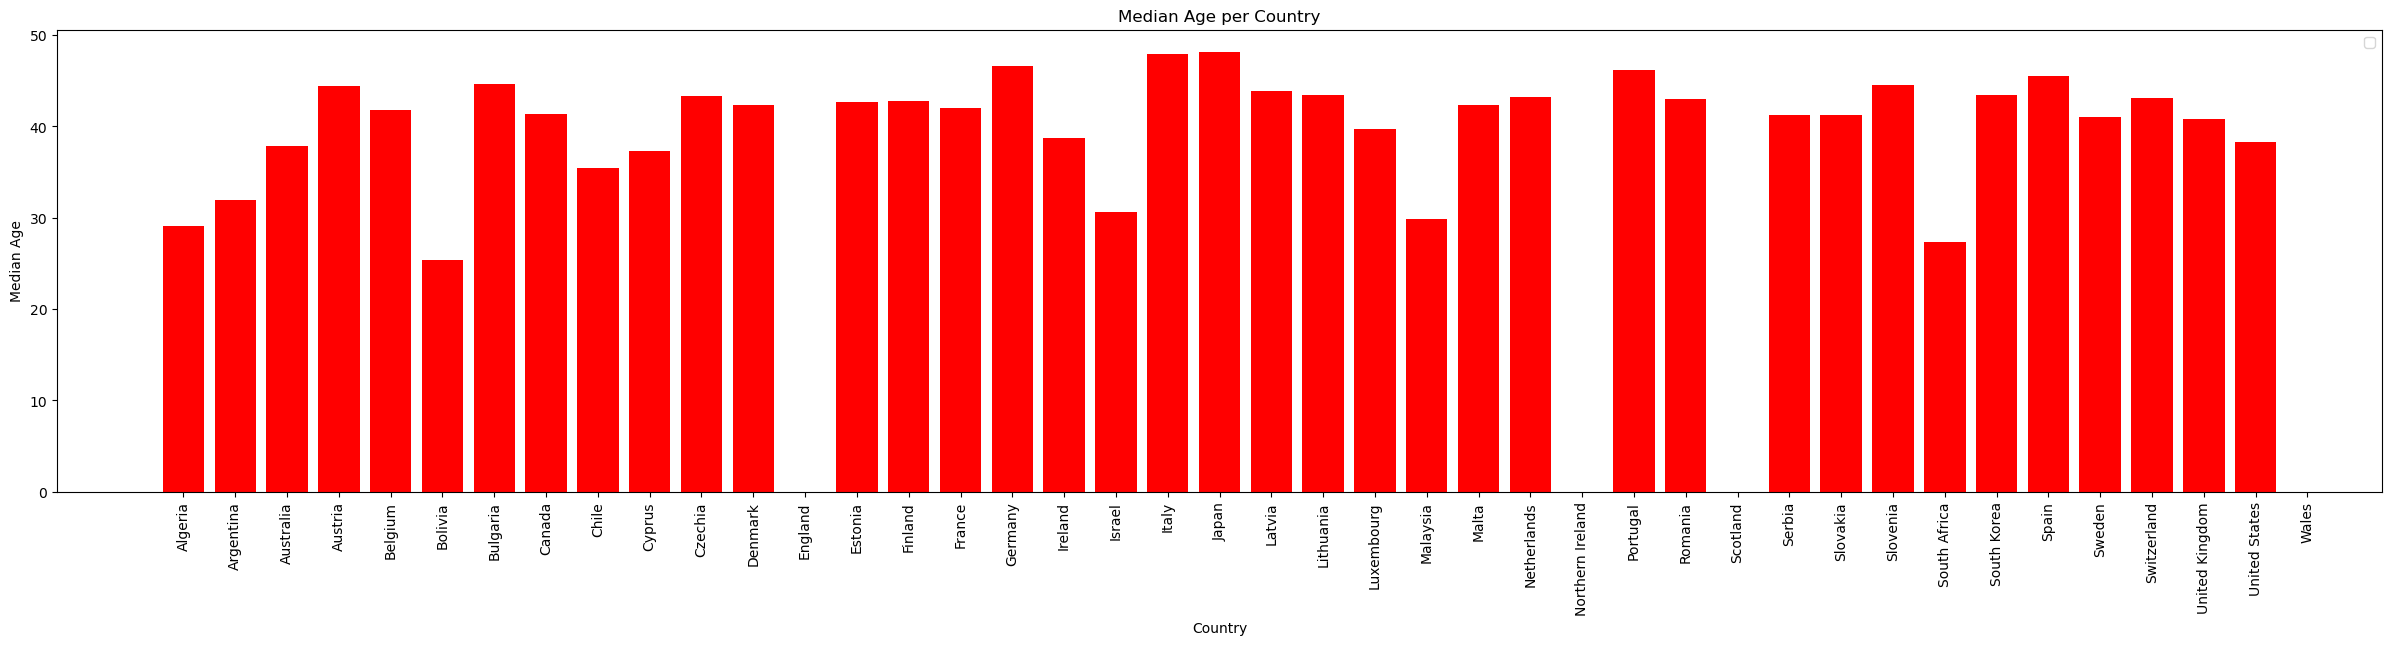

In [27]:
country_median_age = icu_location[["Country", "Median Age"]]


plt.figure(figsize=(30, 6))
plt.bar(country_median_age["Country"], country_median_age["Median Age"], color="red")
plt.title("Median Age per Country")
plt.xlabel("Country")
plt.ylabel("Median Age")
plt.xticks(rotation = "vertical")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


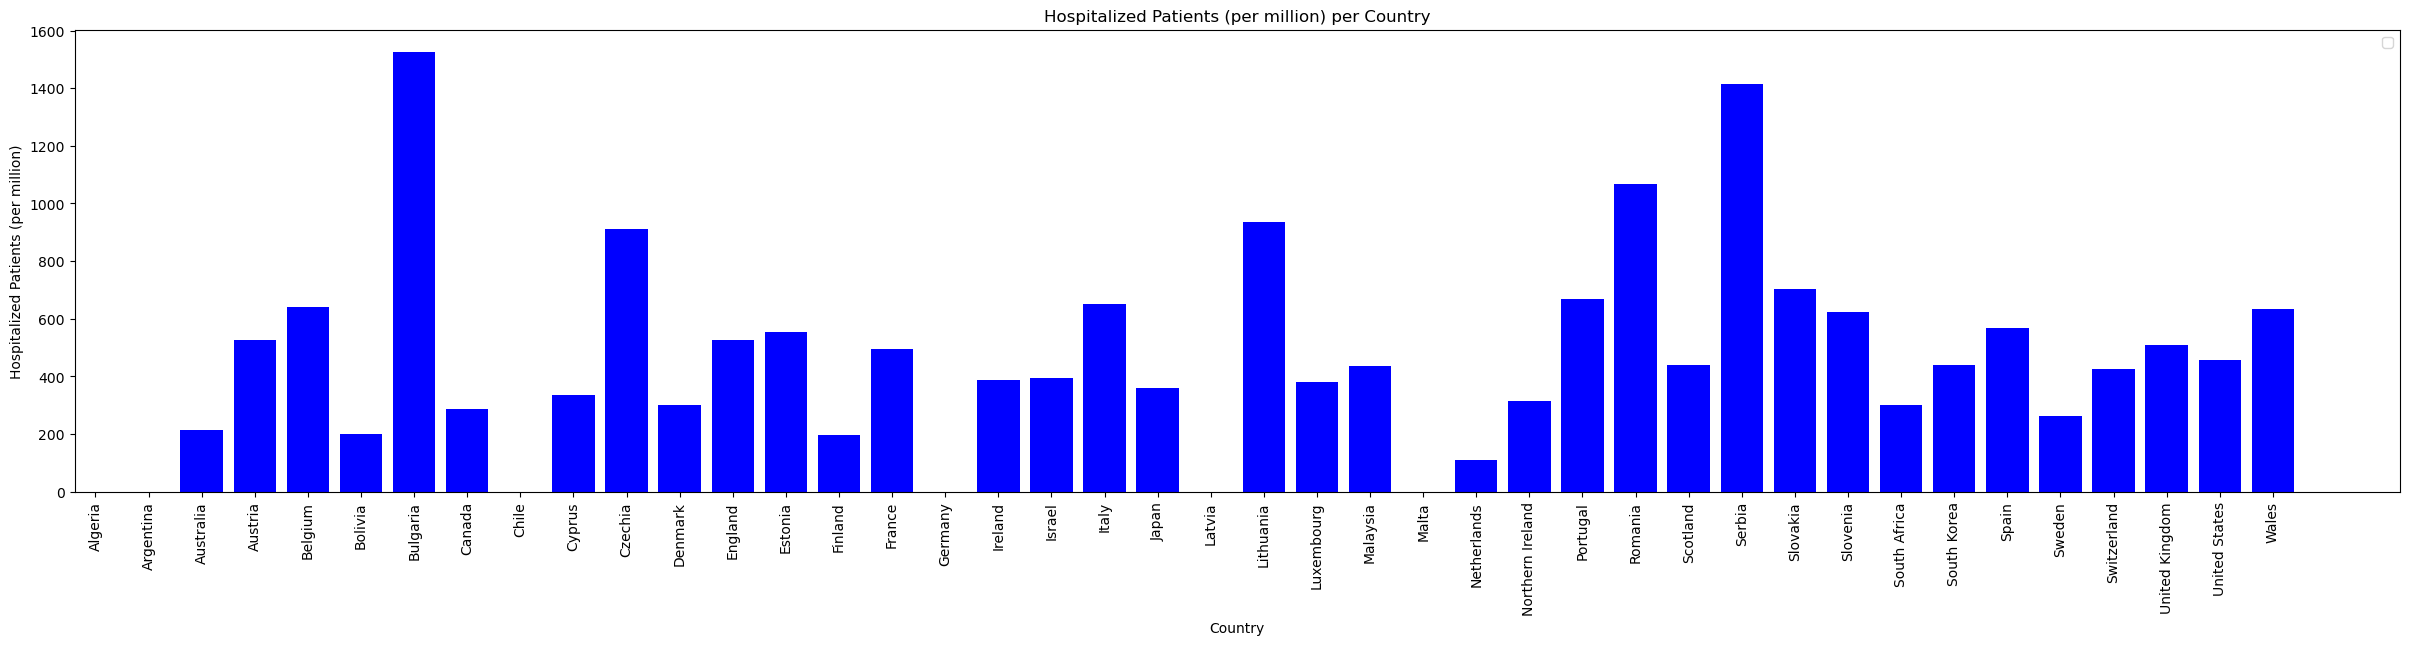

In [28]:
country_hosp = icu_location[["Country", "Hospitalized Patients (per million)"]]


plt.figure(figsize=(30, 6))
plt.bar(country_hosp["Country"], country_hosp["Hospitalized Patients (per million)"], color="blue")
plt.title("Hospitalized Patients (per million) per Country")
plt.xlabel("Country")
plt.ylabel("Hospitalized Patients (per million)")
plt.xticks(rotation = "vertical")
plt.legend()
plt.show()